In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from cartiflette import carti_download
import plotly.express as px

In [2]:
df_patientele = pd.read_csv("Bases de données/Données_Patientele_Departementale.csv", sep=";")
df_patientele['nombre_patients_uniques'] = pd.to_numeric(df_patientele['nombre_patients_uniques'],errors='coerce')
df_patientele.columns = df_patientele.columns.str.replace("\ufeff", "", regex=False).str.strip()

df_patientele_2017 = df_patientele[(df_patientele['annee'] == 2017) & (df_patientele['profession_sante'] == "Médecins généralistes (hors médecins à expertise particulière - MEP)")]           

In [3]:
df_patientele.head()

,annee,profession_sante,region,libelle_region,departement,libelle_departement,nombre_patients_uniques,nombre_patients_medecin_traitant,vision generale all,vision_generale_prescriptions,vision profession territoire,patients_medecin_traitant_integer,patients_uniques_integer
0,2017,Anesthésistes-réanimateurs,27,Bourgogne-Franche-Comté,39,Jura,1309.0,NC,oui,oui,oui,NaN,1309.0
1,2017,Anesthésistes-réanimateurs,27,Bourgogne-Franche-Comté,58,Nièvre,2123.0,NC,oui,oui,oui,NaN,2123.0
2,2017,Anesthésistes-réanimateurs,27,Bourgogne-Franche-Comté,89,Yonne,3634.0,NC,oui,oui,oui,NaN,3634.0
3,2017,Anesthésistes-réanimateurs,28,Normandie,14,Calvados,2512.0,NC,oui,oui,oui,NaN,2512.0
4,2017,Anesthésistes-réanimateurs,28,Normandie,76,Seine-Maritime,2938.0,NC,oui,oui,oui,NaN,2938.0


## Carte des pays différents

(np.float64(-5.876307480152819),
 np.float64(10.295160325375349),
 np.float64(40.84582809366395),
 np.float64(51.57675902873196))

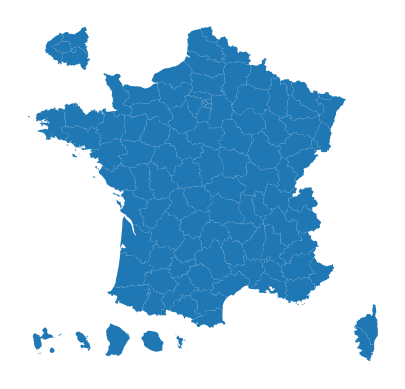

In [4]:
# Téléchargement des informations géospatiales des départements français (DROM compris)

departements = carti_download(
    values = ["France"],
    crs = 4326,
    borders = "DEPARTEMENT",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022
)

# On modifie le code des départements : on rajoute un 0 à ceux qui ont un code à deux chiffres
# departements['INSEE_DEP'] = departements['INSEE_DEP'].str.zfill(3)

# Test d'affichage de la carte
departements.plot().axis('off')

In [5]:
Carte_2017 = df_patientele_2017.copy()
Carte_2017['INSEE_DEP'] = Carte_2017['departement'].str[:3].astype(str)
Carte_2017 = departements.merge(Carte_2017, on='INSEE_DEP', how='left')

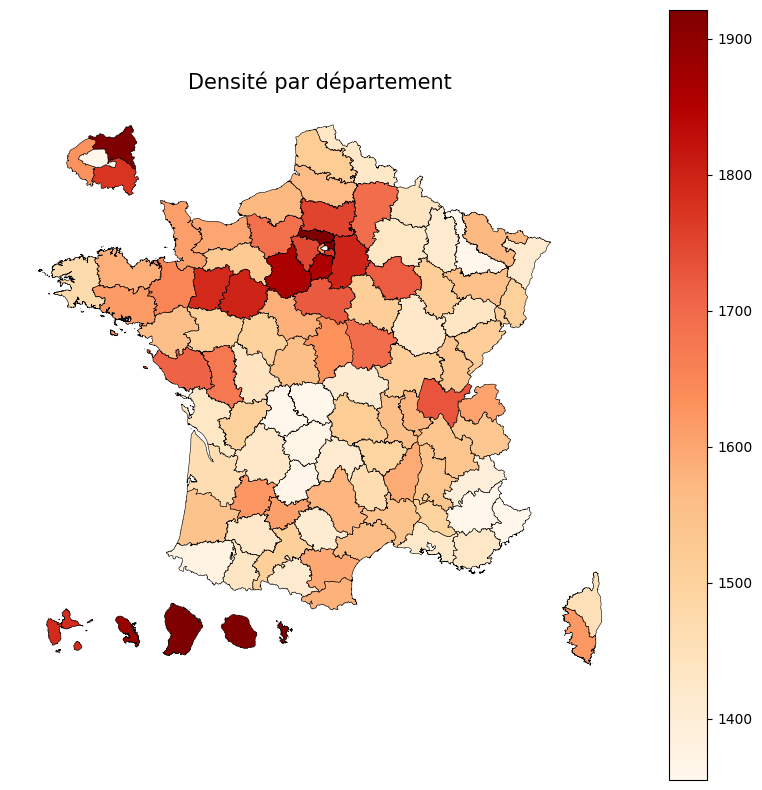

In [6]:
# Tracé pour l'année 2017

vmin = Carte_2017['nombre_patients_uniques'].quantile(0.05)
vmax = Carte_2017['nombre_patients_uniques'].quantile(0.95)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
Carte_2017.plot(
    column='nombre_patients_uniques', 
    cmap='OrRd',
    vmin=vmin,
    vmax=vmax,      
    linewidth=0.4,
    edgecolor='black',
    legend=True,       
    ax=ax
)

# On supprime les axes
ax.axis('off')  
ax.set_title("Densité par département", fontsize=15)
plt.show()

## Graphique Evolution par année

In [7]:
df_medecin = df_patientele[(df_patientele['profession_sante'] == "Médecins généralistes (hors médecins à expertise particulière - MEP)")]  
df_graphique_évol = df_medecin[["annee","libelle_departement","patients_uniques_integer"]]
df_graphique_évol.info

<bound method DataFrame.info of        annee libelle_departement  patients_uniques_integer
414     2017          Guadeloupe                    1788.0
415     2017    Tout département                    2579.0
416     2017    Tout département                    2134.0
417     2017             Mayotte                    3166.0
418     2017               Paris                    1355.0
...      ...                 ...                       ...
39818   2024         Puy-de-Dôme                    1548.0
39819   2024               Rhône                    1699.0
39820   2024    Tout département                    1569.0
39821   2024     Alpes-Maritimes                    1605.0
39822   2024                 Var                    1594.0

[1080 rows x 3 columns]>

/tmp/ipykernel_33623/3048318879.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['annee'] = pd.to_numeric(df['annee'],errors='coerce')
/tmp/ipykernel_33623/3048318879.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


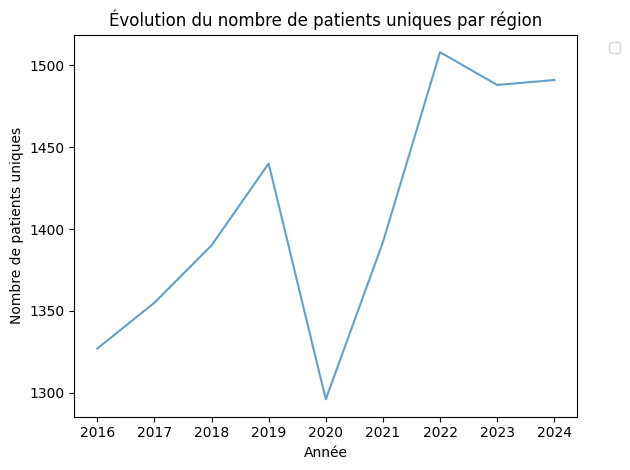

,annee,libelle_departement,patients_uniques_integer
15797,2016,Paris,1327.0
418,2017,Paris,1355.0
7546,2018,Paris,1390.0
4435,2019,Paris,1440.0
2551,2020,Paris,1296.0
4835,2021,Paris,1392.0
29530,2022,Paris,1508.0
12807,2023,Paris,1488.0
14357,2024,Paris,1491.0


In [8]:
L = []

df = df_graphique_évol[df_graphique_évol["libelle_departement"] == "Paris"]
df['annee'] = pd.to_numeric(df['annee'],errors='coerce')
df = df.sort_values(by='annee')
df.head()
plt.plot(df['annee'],
        df['patients_uniques_integer'],
        alpha=0.7
    )

plt.xlabel("Année")
plt.ylabel("Nombre de patients uniques")
plt.title("Évolution du nombre de patients uniques par région")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


df.head(10)

/tmp/ipykernel_33623/4190106649.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


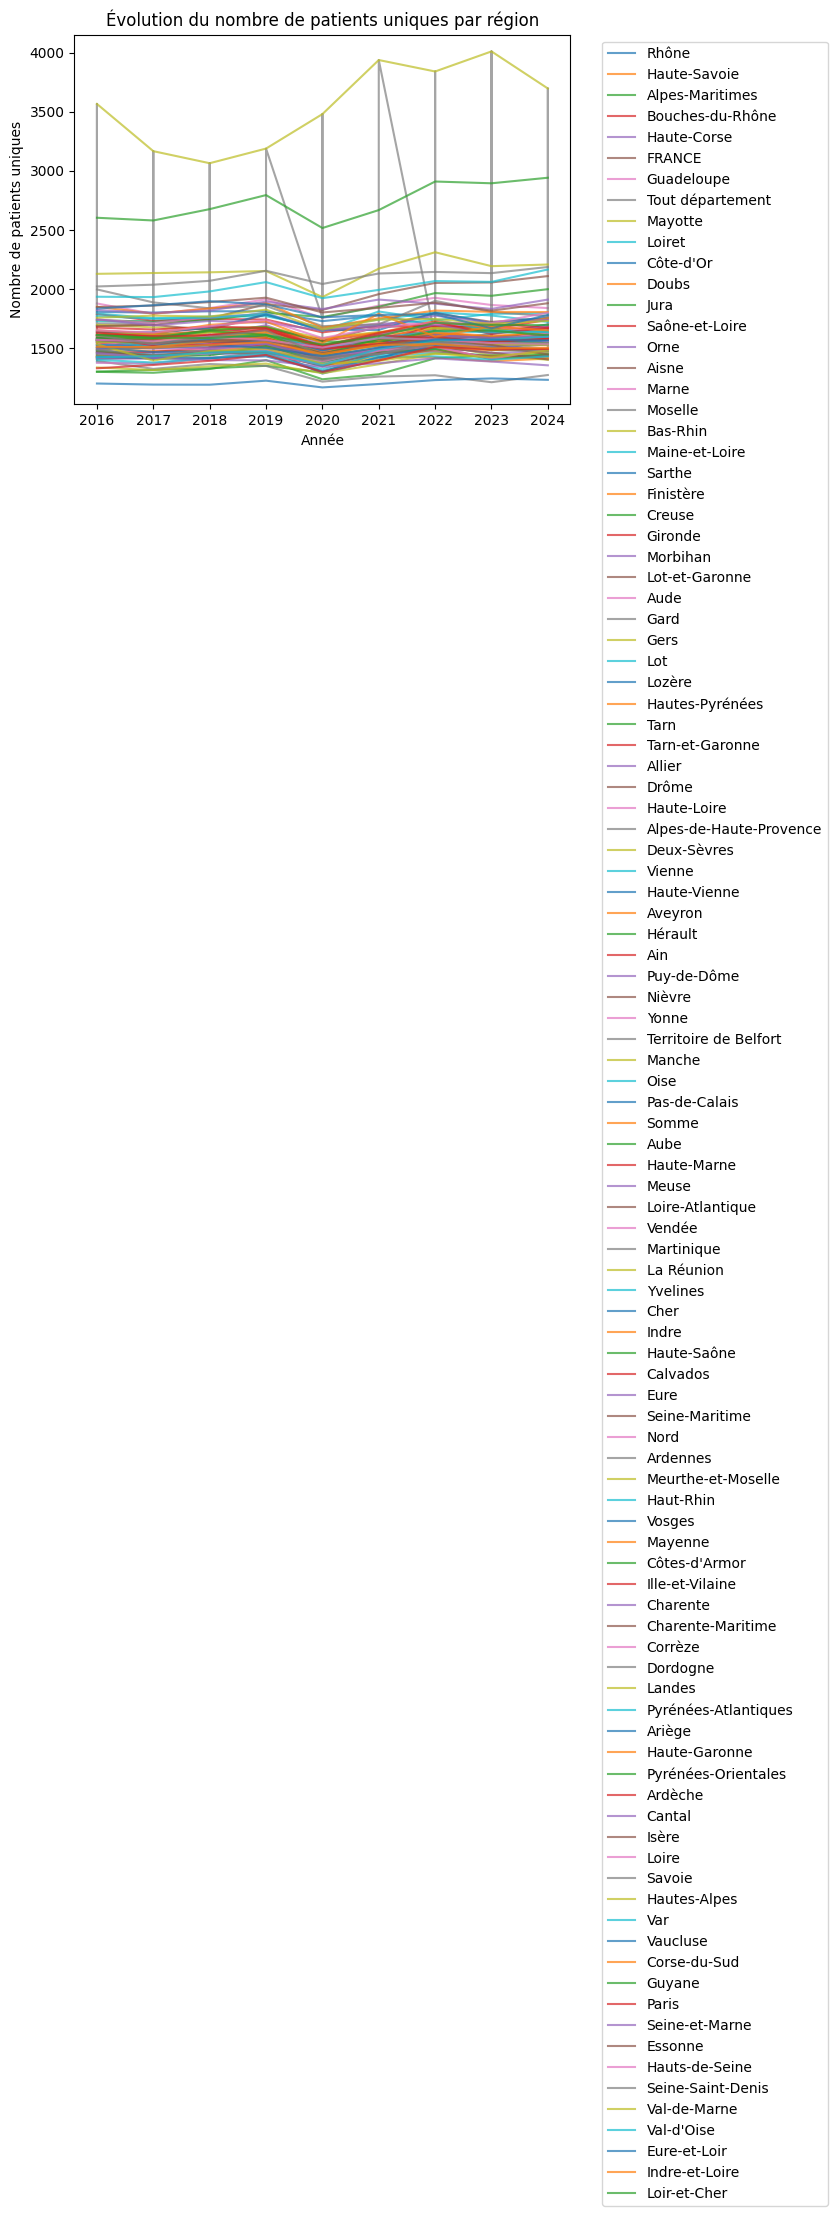

annee
2016    1
2017    1
2018    1
2019    1
2020    1
2021    1
2022    1
2023    1
2024    1
Name: count, dtype: int64

In [9]:
df_graphique_évol = df_graphique_évol.sort_values(by='annee')

for region in df_graphique_évol['libelle_departement'].unique():
    tmp = df_graphique_évol[df_graphique_évol['libelle_departement'] == region]
    plt.plot(
        tmp['annee'],
        tmp['patients_uniques_integer'],
        label=region,
        alpha=0.7
    )

plt.xlabel("Année")
plt.ylabel("Nombre de patients uniques")
plt.title("Évolution du nombre de patients uniques par région")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
df.head(10)
df.shape
df['annee'].value_counts().sort_index()

In [10]:
df = pd.read_excel("Bases de données/medecins_commune_2025.xlsx")
df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'Bases de données/medecins_commune_2025.xlsx'

In [ ]:
# code commune en string à 5 chiffres
df["Cartographie Interactive de la Démographie Médicale"] = df["Cartographie Interactive de la Démographie Médicale"].astype(str).str.zfill(5)

df.head()

,Cartographie Interactive de la Démographie Médicale,Unnamed: 1,Unnamed: 2
0,Référentiel géographique : France par commune ...,NaN,NaN
1,00nan,NaN,Indic1
2,0Code,Libellé,"Les médecins généralistes, toutes activités et..."
3,01001,L'Abergement-Clémenciat,0
4,01002,L'Abergement-de-Varey,0


In [ ]:
gdf = carti_download(
    values=df.set_index("Cartographie Interactive de la Démographie Médicale")["Unnamed: 2"],
    level="COMMUNE",
    year=2023,
    simplify=True
)

There was an error while reading the file from the URL: https://minio.lab.sspcloud.fr/projet-cartiflette/production/provider=IGN/dataset_family=ADMINEXPRESS/source=EXPRESS-COG-TERRITOIRE/year=2023/administrative_level=COMMUNE/crs=2154/region=nan/vectorfile_format=geojson/territory=metropole/simplification=0/raw.geojson
Error message: '/vsimem/pyogrio_4267c4a7ebd94b5bbd81c4707411d070' not recognized as being in a supported file format.; It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.
There was an error while reading the file from the URL: https://minio.lab.sspcloud.fr/projet-cartiflette/production/provider=IGN/dataset_family=ADMINEXPRESS/source=EXPRESS-COG-TERRITOIRE/year=2023/administrative_level=COMMUNE/crs=2154/region=Indic1/vectorfile_format=geojson/territory=metropole/simplification=0/raw.geojson
Error message: '/vsimem/pyogrio_6c466e76484a470988944d9a3cbe9968' not recognized as being in a supported file format.; 

KeyboardInterrupt: 

NameError: name 'gdf' is not defined

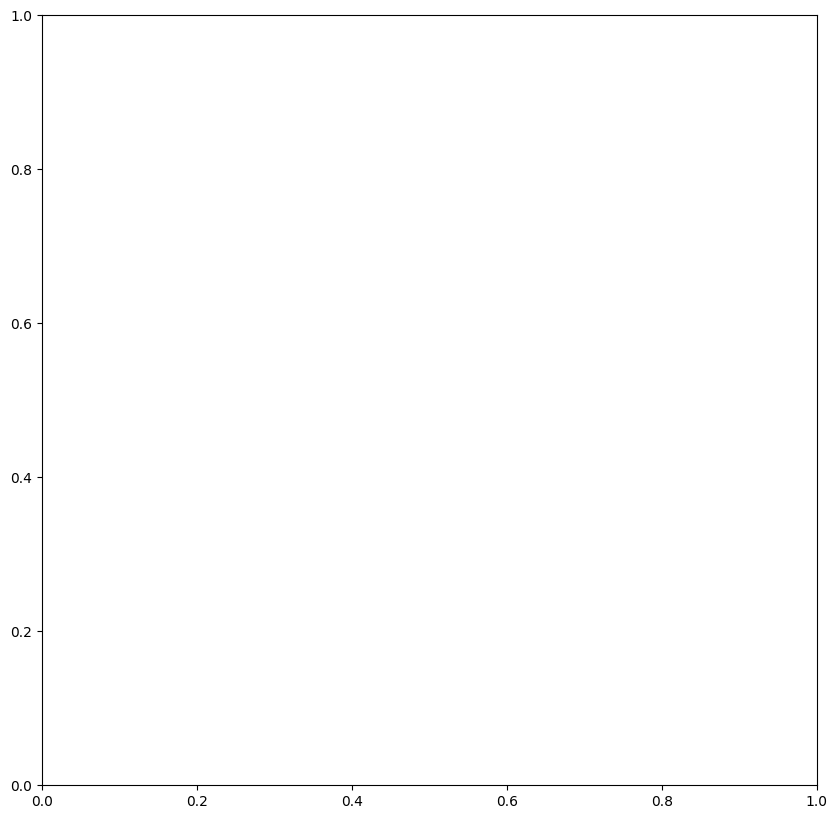

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

gdf.plot(
    column="nb_medecins",
    ax=ax,
    legend=True,
    cmap="OrRd",
    missing_kwds={
        "color": "lightgrey",
        "label": "Données manquantes"
    }
)

ax.set_title("Nombre de médecins par commune", fontsize=14)
ax.axis("off")

plt.show()


In [ ]:
df_medecins_lieu_formation_complet = pd.read_excel("Bases de données/demographie_medecins.xlsx", sheet_name=5)
df_medecins_lieu_formation_complet.head()

df_medecins_lieu_formation= df_medecins_lieu_formation_complet[(df_medecins_lieu_formation_complet['specialites_agregees'] == '1-Médecine générale') 
    & (df_medecins_lieu_formation_complet['region'] == '00-Ensemble')
    & (df_medecins_lieu_formation_complet['specialites'] == '01-Médecine générale')
    ]
df_medecins_lieu_formation.head()
if (df_medecins_lieu_formation[['specialites', 'region', 'specialites_agregees']].nunique().eq(1).all()):
    df_medecins_lieu_formation.drop(columns=['specialites', 'region', 'specialites_agregees'],inplace=True)

df_medecins_lieu_formation.head()

/tmp/ipykernel_156860/987750368.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medecins_lieu_formation.drop(columns=['specialites', 'region', 'specialites_agregees'],inplace=True)


,region_diplome,effectif_2012,effectif_2013,effectif_2014,effectif_2015,effectif_2016,effectif_2017,effectif_2018,effectif_2019,effectif_2020,effectif_2021,effectif_2022,effectif_2023,effectif_2024,effectif_2025
2,00-Ensemble,101435,101385,101904,101935,101799,101755,101939,101381,101355,100621,99941,99457,99009,100019
20,01-Antilles-Guyane,80,112,144,185,247,291,350,394,453,502,538,581,646,709
38,11-Ile de France,22801,22615,22564,22263,21915,21513,21134,20590,20190,19765,19296,18870,18800,18699
56,24-Centre Val de Loire,2279,2288,2293,2274,2238,2209,2199,2172,2200,2168,2139,2138,2139,2149
74,27-Bourgogne Franche Comté,3758,3774,3786,3811,3817,3820,3833,3838,3811,3765,3747,3723,3711,3722


In [ ]:
cols_effectifs = [c for c in df_medecins_lieu_formation.columns if c.startswith("effectif_")]
df_deltas = df_medecins_lieu_formation[cols_effectifs].diff(axis=1)
df_deltas.columns = [f"delta_{c.split('_')[1]}" for c in cols_effectifs]
df_deltas = df_deltas.drop(columns="delta_2012")
df = pd.concat([df_medecins_lieu_formation, df_deltas], axis=1)
df = df[df["region_diplome"] != "00-Ensemble"]
df.head()

,region_diplome,effectif_2012,effectif_2013,effectif_2014,effectif_2015,effectif_2016,effectif_2017,effectif_2018,effectif_2019,effectif_2020,...,delta_2016,delta_2017,delta_2018,delta_2019,delta_2020,delta_2021,delta_2022,delta_2023,delta_2024,delta_2025
20,01-Antilles-Guyane,80,112,144,185,247,291,350,394,453,...,62,44,59,44,59,49,36,43,65,63
38,11-Ile de France,22801,22615,22564,22263,21915,21513,21134,20590,20190,...,-348,-402,-379,-544,-400,-425,-469,-426,-70,-101
56,24-Centre Val de Loire,2279,2288,2293,2274,2238,2209,2199,2172,2200,...,-36,-29,-10,-27,28,-32,-29,-1,1,10
74,27-Bourgogne Franche Comté,3758,3774,3786,3811,3817,3820,3833,3838,3811,...,6,3,13,5,-27,-46,-18,-24,-12,11
92,28-Normandie,4157,4176,4253,4284,4316,4313,4298,4279,4338,...,32,-3,-15,-19,59,-34,-35,-34,-27,91


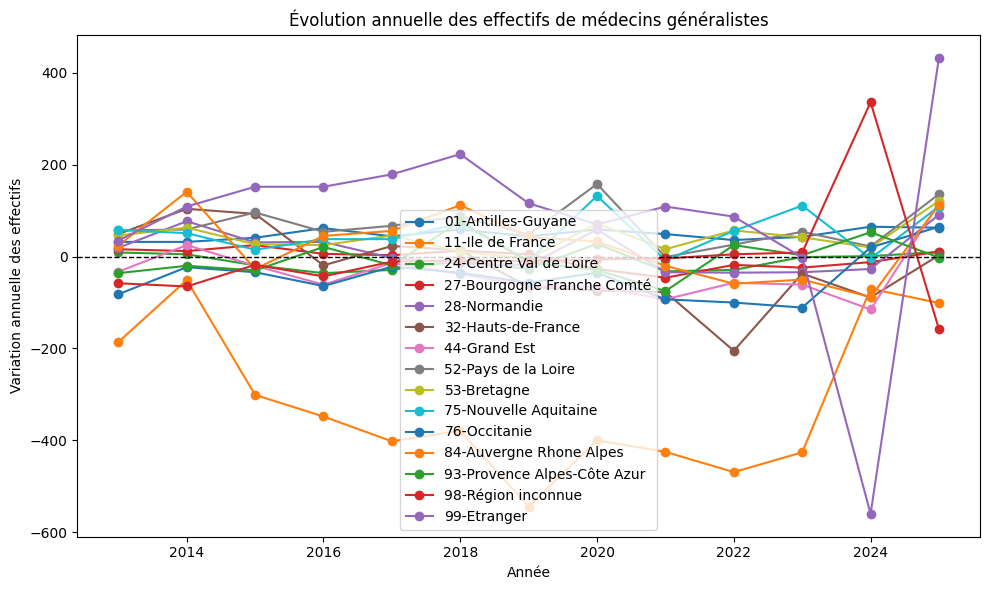

In [ ]:
import matplotlib.pyplot as plt

delta_cols = [c for c in df.columns if c.startswith("delta_")]
years = [int(c.split("_")[1]) for c in delta_cols]

plt.figure(figsize=(10, 6))

for _, row in df.iterrows():
    plt.plot(
        years,
        row[delta_cols],
        marker="o",
        label=row["region_diplome"]
    )

plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Année")
plt.ylabel("Variation annuelle des effectifs")
plt.title("Évolution annuelle des effectifs de médecins généralistes")
plt.legend()
plt.tight_layout()
plt.show()


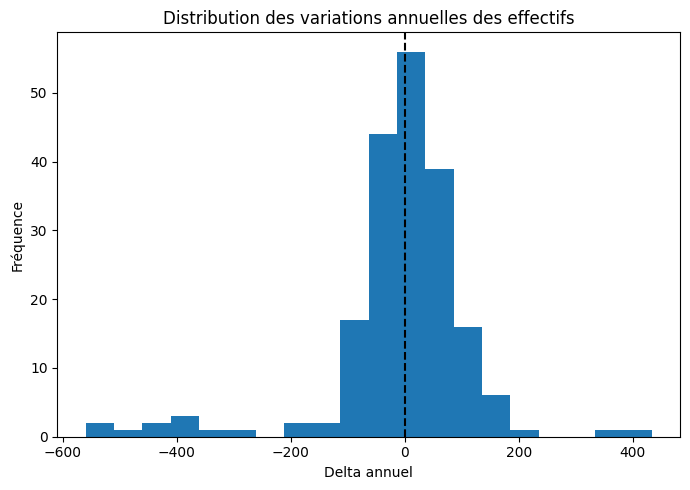

In [ ]:
all_deltas = df[delta_cols].values.flatten()

plt.figure(figsize=(7, 5))
plt.hist(all_deltas, bins=20)
plt.axvline(0, color="black", linestyle="--")
plt.xlabel("Delta annuel")
plt.ylabel("Fréquence")
plt.title("Distribution des variations annuelles des effectifs")
plt.tight_layout()
plt.show()


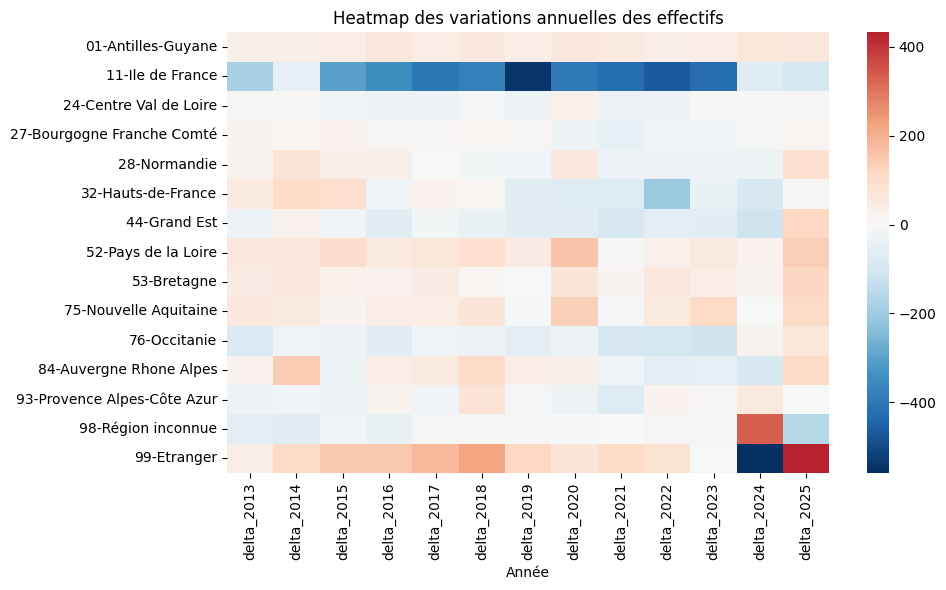

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.heatmap(
    df.set_index("region_diplome")[delta_cols],
    center=0,
    cmap="RdBu_r",
    annot=False
)

plt.title("Heatmap des variations annuelles des effectifs")
plt.xlabel("Année")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [ ]:
df["delta_total"] = df["effectif_2025"] - df["effectif_2012"]

In [12]:
df_medecins_effectif_complet = pd.read_excel("Bases de données/demographie_medecins.xlsx", sheet_name=1)
df_medecins_age_complet = pd.read_excel("Bases de données/demographie_medecins.xlsx", sheet_name=2)
df_medecins_densite_complet = pd.read_excel("Bases de données/demographie_medecins.xlsx", sheet_name=3)

In [13]:
df_cond = df_medecins_effectif[(df_medecins_effectif['exercice']!='0-Ensemble') 
    & (df_medecins_effectif['tranche_age']=='00-Ensemble') 
    & (df_medecins_effectif['region'] == '00-Ensemble') 
    & (df_medecins_effectif['territoire'] == "0-France entière")] 

NameError: name 'df_medecins_effectif' is not defined

In [14]:
df_medecins_secteur = pd.read_excel("Bases de données/demographie_medecins.xlsx", sheet_name=6)
df_medecins_secteur.head()

df_medecins_secteur_réduit= df_medecins_secteur[(df_medecins_secteur['specialites_agregees'] == '1-Médecine générale') 
    & (df_medecins_secteur['region'] == '00-Ensemble')
    & (df_medecins_secteur['departement'] == '000-Ensemble')
    & (df_medecins_secteur['mode_exercice'] == '0-Ensemble')
    & (df_medecins_secteur['territoire'] == '0-France entière')
    & (df_medecins_secteur['specialites'] == '01-Médecine générale')
    ]
df_medecins_secteur_réduit.head()


,territoire,region,departement,mode_exercice,secteur_activite,specialites,specialites_agregees,activités_2012,activités_2013,activités_2014,...,activités_2016,activités_2017,activités_2018,activités_2019,activités_2020,activités_2021,activités_2022,activités_2023,activités_2024,activités_2025
3,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,00-Ensemble,01-Médecine générale,1-Médecine générale,112701,115011,117635,...,121306,122650,124046,124527,125628,126096,126233,126541,129841,131133
21,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,01-Hôpital public,01-Médecine générale,1-Médecine générale,17618,18373,19202,...,19993,20680,21043,21276,21357,21257,21111,20684,20961,21118
39,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,02-Etablissement privé ESPIC,01-Médecine générale,1-Médecine générale,1597,1671,1682,...,1771,1804,1857,1897,1864,1913,1989,1946,2047,2070
57,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,03-Etablissement privé lucratif,01-Médecine générale,1-Médecine générale,1312,1579,1652,...,1918,2000,2098,2187,2251,2279,2290,2335,2402,2434
75,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,"04-Centre de santé, maison de santé",01-Médecine générale,1-Médecine générale,2792,3228,3480,...,3794,3911,3971,4080,4514,4885,5124,5583,6516,7235


/tmp/ipykernel_33623/4056220611.py:19: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


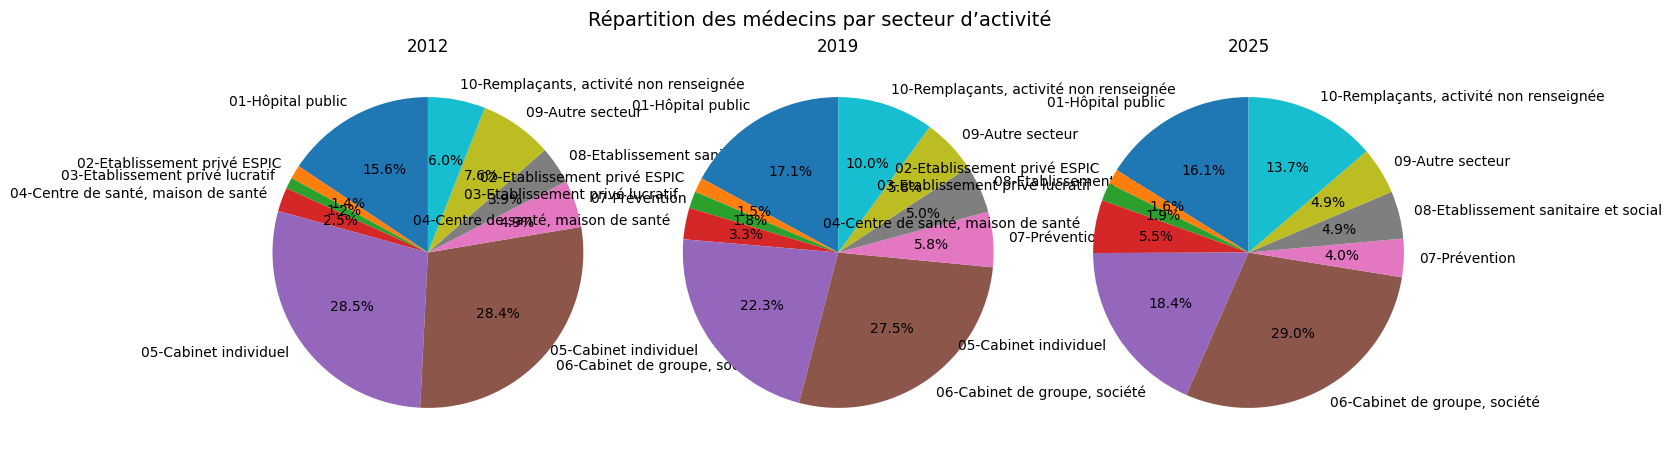

In [15]:
df_medecins_secteur_réduit = df_medecins_secteur_réduit[df_medecins_secteur_réduit["secteur_activite"] != "00-Ensemble"]

def plot_pie_secteur(df, annee, ax):
    df_annuel = df[['secteur_activite', f'activités_{annee}']]

    labels = df_annuel['secteur_activite'].unique()
    sizes = df_annuel[f'activités_{annee}'].unique()

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(f"{annee}")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, annee in zip(axes, [2012, 2019, 2025]):
    plot_pie_secteur(df_medecins_secteur_réduit, annee, ax)

fig.suptitle("Répartition des médecins par secteur d’activité", fontsize=14)
plt.tight_layout()
plt.show()

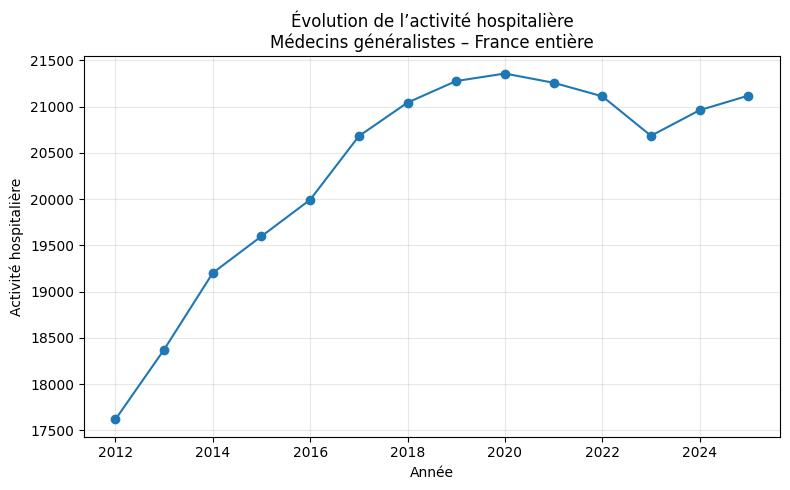

In [ ]:
df_hopital = df_medecins_secteur_réduit[df_medecins_secteur_réduit["secteur_activite"] == "01-Hôpital public"]

# Colonnes d'activité
cols_activite = [c for c in df_hopital.columns if c.startswith("activités_")]

# Années
annees = [int(c.split("_")[1]) for c in cols_activite]


plt.figure(figsize=(8, 5))
plt.plot(annees, df_hopital[cols_activite].iloc[0], marker='o')

plt.xlabel("Année")
plt.ylabel("Activité hospitalière")
plt.title("Évolution de l’activité hospitalière\nMédecins généralistes – France entière")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
df_medecins_effectif_complet = pd.read_excel("Bases de données/demographie_medecins.xlsx", sheet_name=1)

In [ ]:
# Traitement de la feuille des effectifs : on ne conserve que les médecins généralistes et on enlève les variables pas pertinentes ou redondantes
df_medecins_effectif = df_medecins_effectif_complet[(df_medecins_effectif_complet['specialites_agregees'] == '1-Médecine générale') 
    & (df_medecins_effectif_complet['sexe'] == '0-Ensemble')
    & (df_medecins_effectif_complet['exercice']=='0-Ensemble') 
    & (df_medecins_effectif_complet['region'] == '00-Ensemble') 
    & (df_medecins_effectif_complet['territoire'] == "0-France entière")
    & (df_medecins_effectif_complet['tranche_age'] != "00-Ensemble")
    & (df_medecins_effectif_complet['specialites'] == '00-Ensemble')
    ]

df_medecins_tranches = df_medecins_effectif.drop(axis = 1, columns = ['region','sexe', 'specialites', 'specialites_agregees','territoire','departement','exercice'], inplace = True)
df_medecins_effectif.reset_index(drop = True, inplace = True)

df_medecins_effectif

/tmp/ipykernel_8290/2331648065.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medecins_tranches = df_medecins_effectif.drop(axis = 1, columns = ['region','sexe', 'specialites', 'specialites_agregees','territoire','departement','exercice'], inplace = True)


,tranche_age,effectif_2012,effectif_2013,effectif_2014,effectif_2015,effectif_2016,effectif_2017,effectif_2018,effectif_2019,effectif_2020,effectif_2021,effectif_2022,effectif_2023,effectif_2024,effectif_2025
0,01-moins de 30 ans,1175,1427,1704,2039,2133,2249,2454,2422,2442,2210,2056,1992,2024,2167
1,02-entre 30 et 34 ans,6392,6391,6871,7883,8983,10102,11294,12138,12993,13240,13536,13434,12878,12671
2,03-entre 35 et 39 ans,8362,8277,8223,8110,8020,8019,8299,8878,9785,10960,12223,13280,14368,15490
3,04-entre 40 et 44 ans,9946,9701,9480,9184,8911,8548,8547,8475,8284,8175,8225,8444,8947,10062
4,05-entre 45 et 49 ans,13961,12751,11698,10785,10303,9976,9741,9502,9151,8841,8422,8372,8302,8256
5,06-entre 50 et 54 ans,19801,19194,18405,16869,15154,13755,12546,11454,10535,10069,9716,9473,9173,8905
6,07-entre 55 et 59 ans,19403,19139,18952,19229,19352,19376,18773,17864,16327,14603,13156,12008,10913,10165
7,08-entre 60 et 64 ans,16841,17492,17812,17750,17670,17238,16901,16625,16973,17069,16841,16181,15363,14176
8,09-entre 65 et 69 ans,4240,5452,6875,7904,8754,9342,9497,9398,9434,9371,9058,9098,9202,9662
9,10-entre 70 et 74 ans,883,1082,1329,1543,1828,2391,3010,3637,4308,4787,5096,5132,5288,5327


In [ ]:
def nouvelle_tranche(tranche):
    if tranche in ["01-moins de 30 ans", "02-entre 30 et 34 ans"]:
        return "Moins de 35 ans"
    elif tranche in ["03-entre 35 et 39 ans", "04-entre 40 et 44 ans"]:
        return "35–44 ans"
    elif tranche in ["05-entre 45 et 49 ans", "06-entre 50 et 54 ans"]:
        return "45–54 ans"
    elif tranche in ["07-entre 55 et 59 ans", "08-entre 60 et 64 ans"]:
        return "55–64 ans"
    else:
        return "65 ans et +"

df_medecins_effectif["nouvelle_tranche_age"] = df_medecins_effectif["tranche_age"].apply(nouvelle_tranche)
cols_effectifs = [c for c in df_medecins_effectif.columns if c.startswith("effectif_")]

df_medecins_nouvelles_tranches = df_medecins_effectif.groupby("nouvelle_tranche_age")[cols_effectifs].sum().reset_index()
df_medecins_nouvelles_tranches.head()



/tmp/ipykernel_8290/3749423596.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medecins_effectif["nouvelle_tranche_age"] = df_medecins_effectif["tranche_age"].apply(nouvelle_tranche)


,nouvelle_tranche_age,effectif_2012,effectif_2013,effectif_2014,effectif_2015,effectif_2016,effectif_2017,effectif_2018,effectif_2019,effectif_2020,effectif_2021,effectif_2022,effectif_2023,effectif_2024,effectif_2025
0,35–44 ans,18308,17978,17703,17294,16931,16567,16846,17353,18069,19135,20448,21724,23315,25552
1,45–54 ans,33762,31945,30103,27654,25457,23731,22287,20956,19686,18910,18138,17845,17475,17161
2,55–64 ans,36244,36631,36764,36979,37022,36614,35674,34489,33300,31672,29997,28189,26276,24341
3,65 ans et +,5554,7013,8759,10086,11273,12492,13384,14023,14865,15454,15766,16273,17041,18127
4,Moins de 35 ans,7567,7818,8575,9922,11116,12351,13748,14560,15435,15450,15592,15426,14902,14838


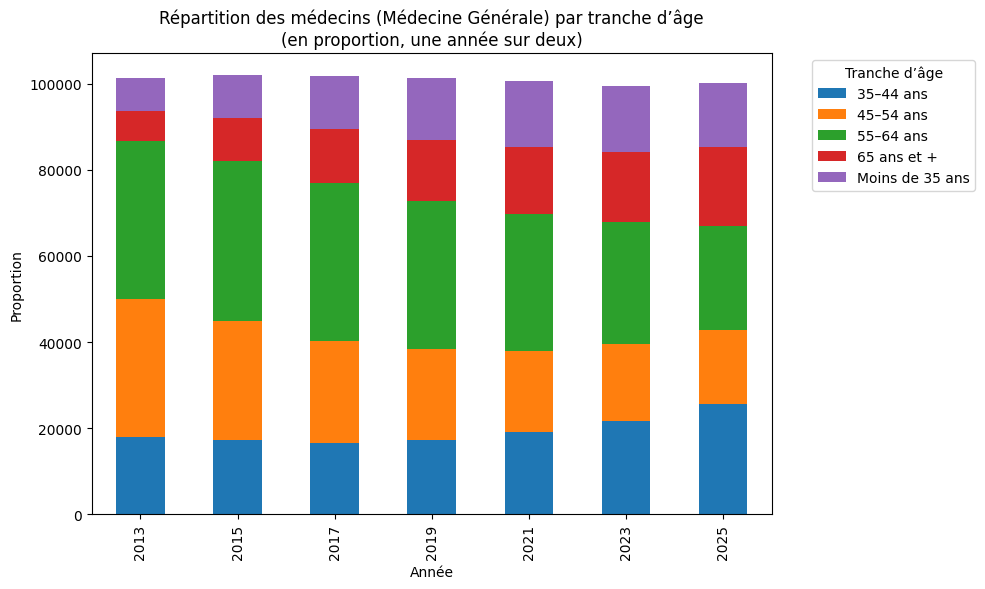

In [ ]:
df_medecins_nouvelles_tranches.columns = ["Nouvelle_tranche_age"] + [f"{a}" for a in range(2012, 2026)]

# 1. Sélection des années voulues (une sur deux, de 2013 à 2025)
annees = list(range(2013, 2026, 2))
cols = [f"{a}" for a in annees]

# 2. Mise en forme : tranches d’âge en colonnes, années en lignes
df_plot = df_medecins_nouvelles_tranches.set_index("Nouvelle_tranche_age")[cols].T

# 3. Passage en proportions (chaque année = 100 %)
#df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)

# 4. Graphique en barres empilées
df_plot.plot(kind="bar",stacked=True,figsize=(10, 6))

plt.ylabel("Proportion")
plt.xlabel("Année")
plt.title("Répartition des médecins (Médecine Générale) par tranche d’âge\n(en proportion, une année sur deux)")
plt.legend(title="Tranche d’âge", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


In [22]:
df_medecins_specialité = df_medecins_effectif_complet[(df_medecins_effectif_complet['sexe'] == '0-Ensemble')
    & (df_medecins_effectif_complet['departement'] == '000-Ensemble')
    & (df_medecins_effectif_complet['exercice']=='0-Ensemble') 
    & (df_medecins_effectif_complet['region'] == '00-Ensemble') 
    & (df_medecins_effectif_complet['territoire'] == "0-France entière")
    & (df_medecins_effectif_complet['tranche_age'] == "00-Ensemble")
    & (df_medecins_effectif_complet['specialites'] != '00-Ensemble')
    ]

df_medecins_specialité.drop(axis = 1, columns = ['region','specialites_agregees','sexe', 'tranche_age','territoire','departement','exercice'], inplace = True)
df_medecins_specialité.reset_index(drop = True, inplace = True)
df_medecins_specialité.head()

/tmp/ipykernel_33623/3033301306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medecins_specialité.drop(axis = 1, columns = ['region','specialites_agregees','sexe', 'tranche_age','territoire','departement','exercice'], inplace = True)


,specialites,effectif_2012,effectif_2013,effectif_2014,effectif_2015,effectif_2016,effectif_2017,effectif_2018,effectif_2019,effectif_2020,effectif_2021,effectif_2022,effectif_2023,effectif_2024,effectif_2025
0,01-Médecine générale,101435,101385,101904,101935,101799,101755,101939,101381,101355,100621,99941,99457,99009,100019
1,02-Chirurgie,11984,12225,12448,12665,12887,13106,13314,13405,13644,13788,13956,13952,14139,14332
2,03-Ophtalmologie,5760,5817,5820,5865,5881,5900,5853,5821,5850,5826,5794,5749,5825,5981
3,04-Oto-rhino-laryngologie,3018,3043,3059,3042,3061,3048,3022,3006,3023,2999,2996,2963,2937,2933
4,05-Anesthésie-Réanimation,10846,11008,11145,11368,11512,11666,11846,11856,12063,12215,12523,12763,13273,13536


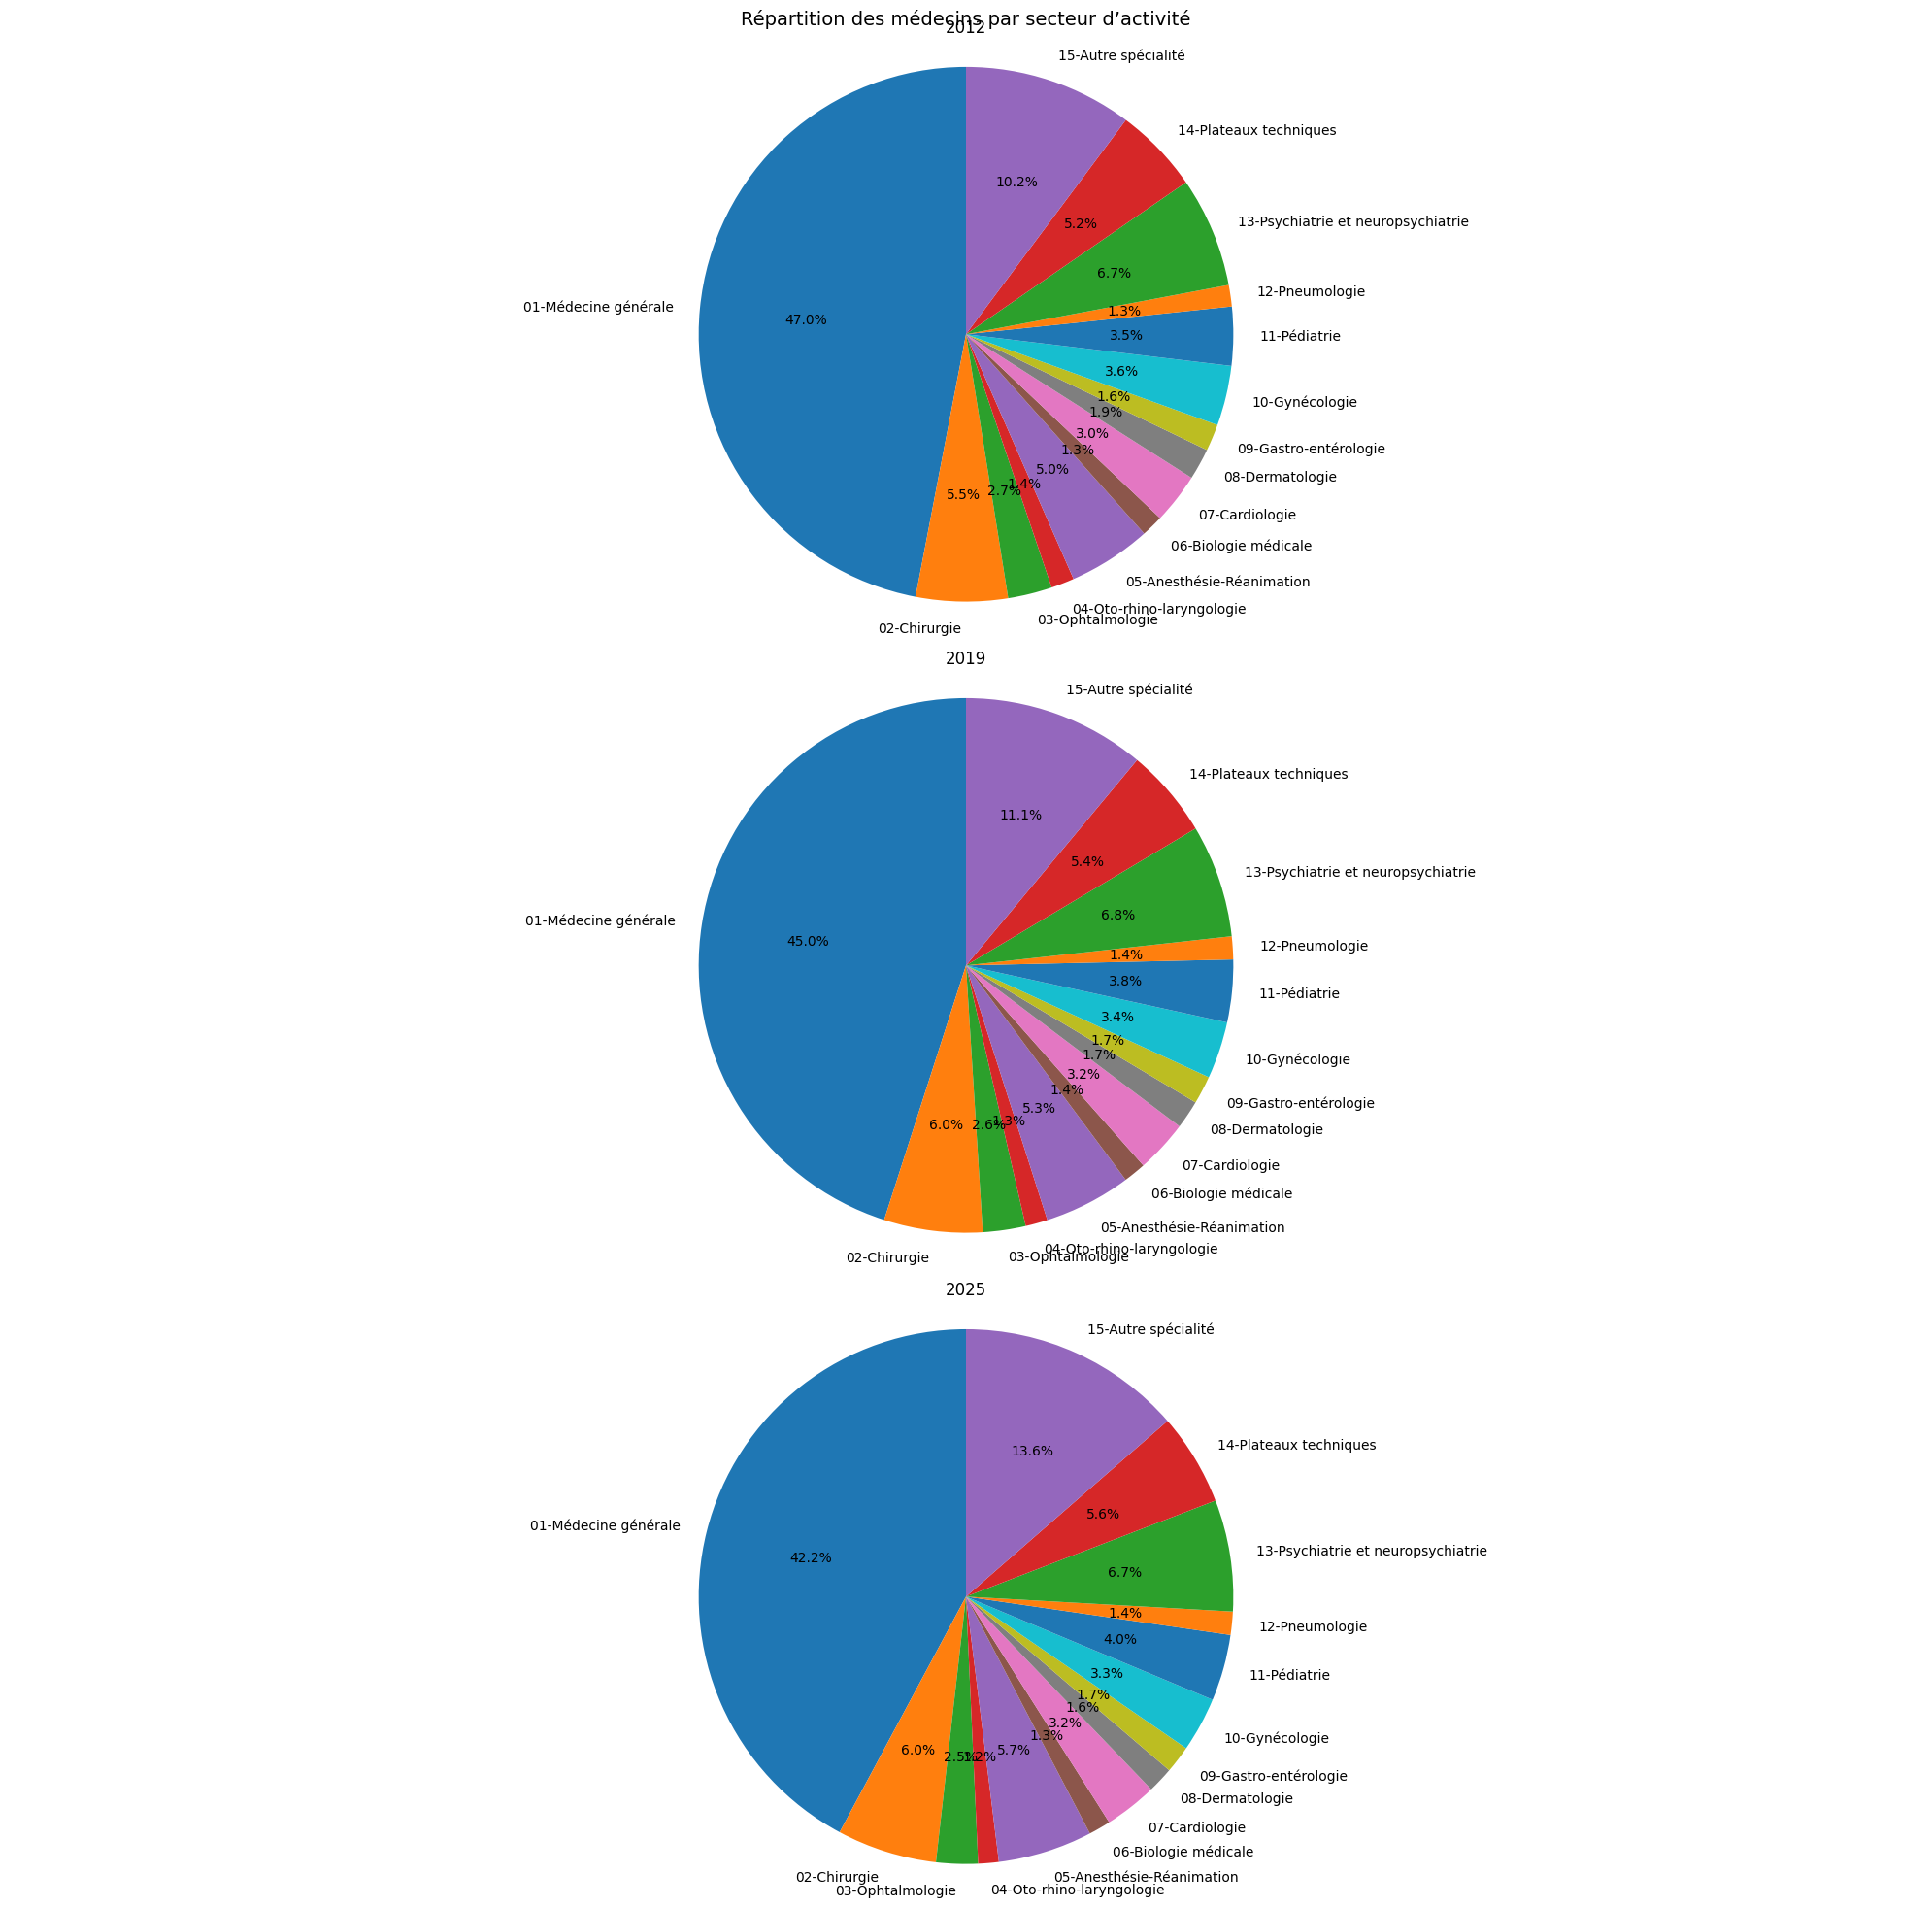

In [27]:
def plot_pie_secteur(df, annee, ax):
    df_annuel = df[['specialites', f'effectif_{annee}']]

    labels = df_annuel['specialites'].unique()
    sizes = df_annuel[f'effectif_{annee}'].unique()

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(f"{annee}")

fig, axes = plt.subplots(3, 1, figsize=(20, 20))

for ax, annee in zip(axes, [2012, 2019, 2025]):
    plot_pie_secteur(df_medecins_specialité, annee, ax)

fig.suptitle("Répartition des médecins par secteur d’activité", fontsize=14)
plt.tight_layout()
plt.show()

In [31]:
df_medecins_parité = df_medecins_effectif_complet[(df_medecins_effectif_complet['sexe'] != '0-Ensemble')
    & (df_medecins_effectif_complet['departement'] == '000-Ensemble')
    & (df_medecins_effectif_complet['exercice']=='0-Ensemble') 
    & (df_medecins_effectif_complet['region'] == '00-Ensemble') 
    & (df_medecins_effectif_complet['territoire'] == "0-France entière")
    & (df_medecins_effectif_complet['tranche_age'] == "00-Ensemble")
    & (df_medecins_effectif_complet['specialites'] == '00-Ensemble')
    & (df_medecins_effectif_complet['specialites_agregees'] == '1-Médecine générale')
    ]

df_medecins_parité.drop(axis = 1, columns = ['region','specialites_agregees','specialites', 'tranche_age','territoire','departement','exercice'], inplace = True)
df_medecins_parité.reset_index(drop = True, inplace = True)
df_medecins_parité.head()

/tmp/ipykernel_33623/3698996331.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medecins_parité.drop(axis = 1, columns = ['region','specialites_agregees','specialites', 'tranche_age','territoire','departement','exercice'], inplace = True)


,sexe,effectif_2012,effectif_2013,effectif_2014,effectif_2015,effectif_2016,effectif_2017,effectif_2018,effectif_2019,effectif_2020,effectif_2021,effectif_2022,effectif_2023,effectif_2024,effectif_2025
0,1-Hommes,60035,59183,58644,57634,56579,55556,54550,53146,52255,50936,49754,48754,47822,47567
1,2-Femmes,41400,42202,43260,44301,45220,46199,47389,48235,49100,49685,50187,50703,51187,52452


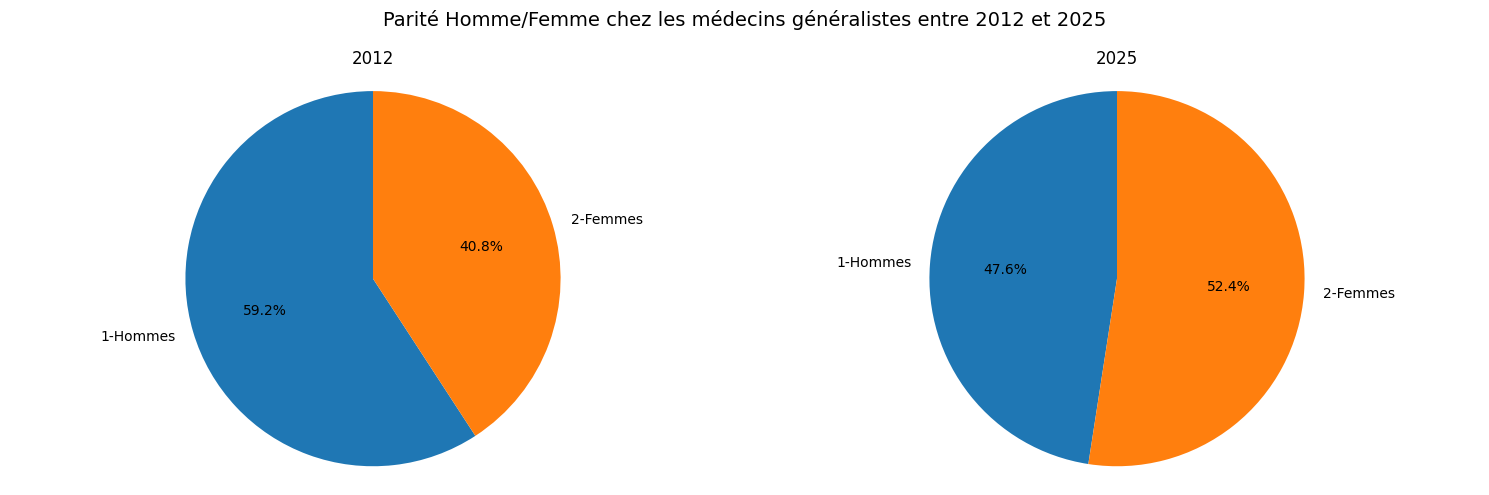

In [39]:
def plot_pie_secteur(df, annee, ax):
    df_annuel = df[['sexe', f'effectif_{annee}']]

    labels = df_annuel['sexe'].unique()
    sizes = df_annuel[f'effectif_{annee}'].unique()

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(f"{annee}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for ax, annee in zip(axes, [2012, 2025]):
    plot_pie_secteur(df_medecins_parité, annee, ax)

fig.suptitle("Parité Homme/Femme chez les médecins généralistes entre 2012 et 2025", fontsize=14)
plt.tight_layout()
plt.show()

In [47]:
df_medecins_parité = df_medecins_effectif_complet[(df_medecins_effectif_complet['sexe'] != '0-Ensemble')
    & (df_medecins_effectif_complet['departement'] == '000-Ensemble')
    & (df_medecins_effectif_complet['exercice']=='0-Ensemble') 
    & (df_medecins_effectif_complet['region'] == '00-Ensemble') 
    & (df_medecins_effectif_complet['territoire'] == "0-France entière")
    & (df_medecins_effectif_complet['tranche_age'] == "00-Ensemble")
    & (df_medecins_effectif_complet['specialites'] != '00-Ensemble')
    & (df_medecins_effectif_complet['specialites_agregees'] == '2-Autres spécialités')
    ]

df_medecins_parité.drop(axis = 1, columns = ['region','specialites_agregees','specialites', 'tranche_age','territoire','departement','exercice'], inplace = True)
df_medecins_parité.reset_index(drop = True, inplace = True)
df_medecins_parité.head()

/tmp/ipykernel_33623/2594526148.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medecins_parité.drop(axis = 1, columns = ['region','specialites_agregees','specialites', 'tranche_age','territoire','departement','exercice'], inplace = True)


,sexe,effectif_2012,effectif_2013,effectif_2014,effectif_2015,effectif_2016,effectif_2017,effectif_2018,effectif_2019,effectif_2020,effectif_2021,effectif_2022,effectif_2023,effectif_2024,effectif_2025
0,1-Hommes,10669,10805,10896,11007,11095,11176,11234,11172,11290,11297,11324,11246,11327,11366
1,2-Femmes,1315,1420,1552,1658,1792,1930,2080,2233,2354,2491,2632,2706,2812,2966
2,1-Hommes,3227,3259,3256,3269,3281,3282,3258,3246,3266,3249,3266,3277,3315,3388
3,2-Femmes,2533,2558,2564,2596,2600,2618,2595,2575,2584,2577,2528,2472,2510,2593
4,1-Hommes,2405,2387,2386,2336,2322,2288,2229,2185,2159,2113,2076,2021,1979,1953


ValueError: 'labels' must be of length 'x', not 2

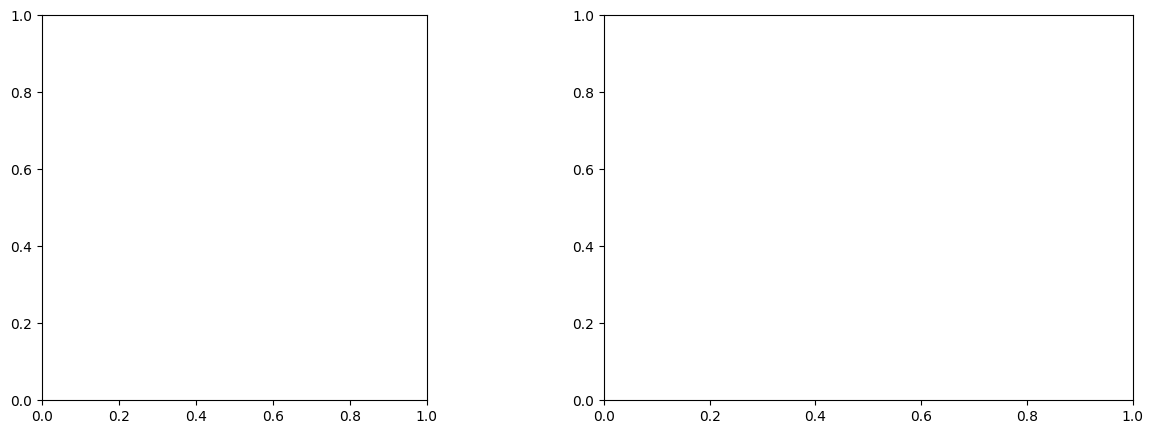

In [ ]:
df_medecins_nouvelles_tranches.columns = ["Nouvelle_tranche_age"] + [f"{a}" for a in range(2012, 2026)]

# 1. Sélection des années voulues (une sur deux, de 2013 à 2025)
annees = list(range(2013, 2026, 2))
cols = [f"{a}" for a in annees]

# 2. Mise en forme : tranches d’âge en colonnes, années en lignes
df_plot = df_medecins_nouvelles_tranches.set_index("Nouvelle_tranche_age")[cols].T

# 3. Passage en proportions (chaque année = 100 %)
#df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)

# 4. Graphique en barres empilées
df_plot.plot(kind="bar",stacked=True,figsize=(10, 6))

plt.ylabel("Proportion")
plt.xlabel("Année")
plt.title("Répartition des médecins (Médecine Générale) par tranche d’âge\n(en proportion, une année sur deux)")
plt.legend(title="Tranche d’âge", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
